# Multisession registration with CaImAn

This notebook will help to demonstrate how to use CaImAn on movies recorded in multiple sessions. CaImAn has in-built functions that align movies from two or more sessions and try to recognize components that are imaged in some or all of these recordings.

The basic function for this is `caiman.base.rois.register_ROIs()`. It takes two sets of spatial components and finds components present in both using an intersection over union metric and the Hungarian algorithm for optimal matching.
`caiman.base.rois.register_multisession()` takes a list of spatial components, aligns sessions 1 and 2, keeps the union of the matched and unmatched components to register it with session 3 and so on.

In [1]:
import pickle
from caiman.base.rois import register_multisession
from caiman.utils import visualization
from caiman.utils.utils import download_demo
from matplotlib import pyplot as plt
import numpy as np
from scipy.sparse import csc_array
import os
from caiman.source_extraction.cnmf.cnmf import load_CNMF


2024-05-20 18:11:37.869001: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


We provide an example file generated from data courtesy of Sue Ann Koay and David Tank (Princeton University). The file contains the spatial footprints derived from the CNMF analysis of the same FOV over six different days, as well as a template (correlation image) for each day. The `download_demo` command will automatically download the file and store it in your caiman_data folder the first time you run it. To use the demo in your own dataset you can set:

```file_path = '/path/to/file'```

or construct a list of spatial footprints and templates and use that to perform the registration as shown below.

In [ ]:
# Load multisession data (spatial components and mean intensity templates) (should be replaced by actual data)
# file_path = download_demo('alignment.pickle')
# infile = open(file_path,'rb')
# data = pickle.load(infile)
# infile.close()

# spatial = data[0]
# templates = data[1]
# dims = templates[0].shape

In [2]:
dir01 = '/home/watson/Documents/caiman_fromCluster/72777/sound_discrimination/day9'
data01 = 'output_rescaled_cnmf_save.hdf5'
temp01 = 'output_rescaled.pickle'
tempFile01 = dir01 + os.sep + temp01
dataFile01 = dir01 + os.sep + data01
with open(tempFile01, 'rb') as f:
    template01 = pickle.load(f)
data1 = load_CNMF(dataFile01)

spatial1=data1.estimates.A
spatial_np1 = spatial1.toarray()
idx_1 = data1.estimates.idx_components
spatial_csc1 = csc_array(spatial_np1[:,idx_1],dtype=np.float64)




In [3]:
dir02 = '/home/watson/Documents/caiman_fromCluster/49142/06072023/13_04_23/'
data02 = 'cnmf_save_40_79.hdf5'
temp02 = 'output_40_79.pickle'
tempFile02 = dir02 + os.sep + temp02
dataFile02 = dir02 + os.sep + data02
with open(tempFile02, 'rb') as f:
    template02 = pickle.load(f)
data2 = load_CNMF(dataFile02)


spatial2=data2.estimates.A
spatial_np2 = spatial2.toarray()
idx_2 = data2.estimates.idx_components
spatial_csc2 = csc_array(spatial_np2[:,idx_2],dtype=np.float64)

In [ ]:
# import caiman as cm
# bord_px =0
# fname_new = '/home/watson/Documents/caiman_fromCluster/49142/06072023/13_04_23/memmap_d1_600_d2_600_d3_1_order_C_frames_40000.mmap'
# Yr,dims,T=cm.load_memmap(fname_new)
# images = Yr.T.reshape((T,)+dims,order='F')

In [4]:
idx_list = [idx_1,idx_2]
dims_template = template01[0].shape
templates = [template01[0],template02[0]]
spatial = [spatial1,spatial2]

In [5]:
cnm_list = [data1,data2]

In [6]:
size1 = data1.estimates.C.shape
size2 = data2.estimates.C.shape
tot_len = size1[1] + size2[1] 
length = [size1[1],size2[1]]

In [ ]:
# from caiman.source_extraction import cnmf
# from caiman.source_extraction.cnmf import params as params
# min_SNR = 5            # adaptive way to set threshold on the transient size
# r_values_min = 0.85
# cnm=cnmf.CNMF(n_processes=1,dview=None,Ain=None,params=None)

# cnm.params.set('quality', {'min_SNR': min_SNR,
#                            'rval_thr': r_values_min,
#                            'use_cnn': False})

# data1.estimates.evaluate_components(images, cnm.params, dview=None)

In [ ]:
# idx_1_new = data1.estimates.idx_components

In [ ]:
# spatial1=data1.estimates.A
# spatial_np1 = spatial1.toarray()
# spatial_csc1 = csc_array(spatial_np1[:,idx_1],dtype=np.float64)

# visualization.plot_contours(spatial_csc1, templates[0],colors='k');

In [ ]:
fname_new =  '/home/watson/Documents/caiman_fromCluster/49142/06072023/13_04_23/memmap_d1_600_d2_600_d3_1_order_C_frames_39245.mmap'
import caiman as cm

In [ ]:
Yr_data,dims_memmap,T_memmap=cm.load_memmap(fname_new)
images_memmap = Yr_data.T.reshape((T_memmap,)+dims_memmap,order='F')

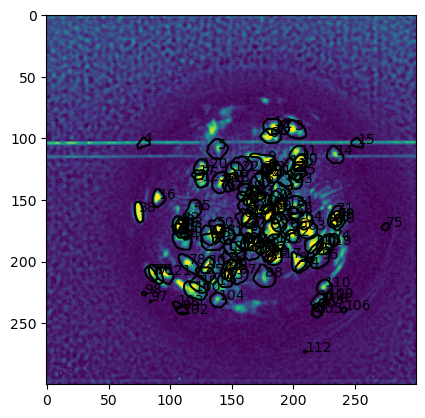

In [8]:
visualization.plot_contours(spatial1[:], templates[0],colors='k');

In [ ]:
visualization.plot_contours(spatial2, templates[1],colors='k');

In [ ]:
A_2 = data2.estimates.A
b_2 = data2.estimates.b
C_2 = data2.estimates.C
f_2 = data2.estimates.f
bl_2 = data2.estimates.bl
c1_2 = data2.estimates.c1
g_2 = data2.estimates.g
sn_2 = data2.estimates.sn

In [ ]:
idx_1

In [ ]:
# A_added = np.append(spatial_np1, spatial_np2[:,[20]],axis=1)

In [ ]:
# A_added.shape

In [ ]:
# from caiman.source_extraction.cnmf.initialization import downscale

In [ ]:
# def findEstimatesB(savedEst,imgs):
#     AC = savedEst.A.dot(savedEst.C)
#     if savedEst.W is not None:
#         ssub_B = int(round(np.sqrt(np.prod(dims) / savedEst.W.shape[0])))
#         B = imgs.reshape((-1, np.prod(dims)), order='F').T - AC
#         if ssub_B == 1:
#             B = savedEst.b0[:, None] + savedEst.W.dot(B - savedEst.b0[:, None])
#         else:
#             WB = savedEst.W.dot(downscale(B.reshape(dims + (B.shape[-1],), order='F'),
#                           (ssub_B, ssub_B, 1)).reshape((-1, B.shape[-1]), order='F'))
#             Wb0 = savedEst.W.dot(downscale(savedEst.b0.reshape(dims, order='F'),
#                           (ssub_B, ssub_B)).reshape((-1, 1), order='F'))
#             B = savedEst.b0.flatten('F')[:, None] + (np.repeat(np.repeat((WB - Wb0).reshape(((dims[0] - 1) // ssub_B + 1, (dims[1] - 1) // ssub_B + 1, -1), order='F'),
#                                  ssub_B, 0), ssub_B, 1)[:dims[0], :dims[1]].reshape((-1, B.shape[-1]), order='F'))
#         B = B.reshape(dims + (-1,), order='F').transpose([2, 0, 1])
#     elif savedEst.b is not None and savedEst.f is not None:
#         B = savedEst.b.dot(savedEst.f)
#         if 'matrix' in str(type(B)):
#             B = B.toarray()
#         B = B.reshape(dims + (-1,), order='F').transpose([2, 0, 1])
#     else:
#         B = np.zeros_like(Y_rec)

# savedEst = data1.estimates
# B = findEstimatesB(savedEst,images)

In [ ]:
# def HALS4activity(Yr, A, b, iters=100):
#     if b is not None:
#         Ab =  np.c_[A, b]
#     else:
#         Ab = A
#     U = Ab.T.dot(Yr)
#     V = Ab.T.dot(Ab) + np.finfo(Ab.dtype).eps
#     Cf = U/V.diagonal()[:,None]
#     for _ in range(iters):
#         for m in range(len(U)):  # neurons and background
#             Cf[m] = np.clip(Cf[m] + (U[m] - V[m].dot(Cf)) / V[m, m], 0, np.inf)
#     return Cf

In [ ]:
# Cf = HALS4activity(Yr,A,b)

In [ ]:
# with open(dir02+os.sep+'A_added.pickle','wb') as f:
#     pickle.dump(A_added,f)

In [ ]:
with open(dir01+os.sep+'cf.pickle','rb') as f:
    C_init = pickle.load(f)

In [ ]:
# import logging 
# logging.basicConfig(format=
#                           "%(relativeCreated)12d [%(filename)s:%(funcName)20s():%(lineno)s] [%(process)d] %(message)s",
#                     # filename="/tmp/caiman.log",
#                     level=logging.INFO)

In [ ]:
from caiman.source_extraction.cnmf.temporal import update_temporal_components
# C_new, A_new, b_new, f_new, S_new, bl_new, c1_new, sn_new, g_new, YrA_new, lam_new
C_new, A_new, b_new, f_new, S_new, bl_new, c1_new, sn_new, g_new, YrA_new, lam_new = update_temporal_components(Yr_data, A_2, b_2, C_init,fin=None,bl=bl_2,c1=c1_2,g=g_2,sn=sn_2,p=1)

In [ ]:
from caiman.source_extraction.cnmf.utilities import detrend_df_f
F_df_new = detrend_df_f(A_2,b_new,C_new,f_new,YrA = YrA_new)

In [ ]:
# spatial_np1_new =A_new.toarray()
# spatial_csc1_new = csc_array(spatial_np1_new[:,idx_2[:-2]],dtype=np.float64)
# visualization.plot_contours(spatial1[:,13], templates[0],colors='k');

In [8]:
idx_1

array([ 15,  21,  22,  25,  30,  31,  32,  33,  34,  35,  47,  48,  50,
        51,  54,  56,  57,  58,  61,  62,  63,  64,  72,  73,  74,  75,
        76,  77,  82,  87,  89, 100, 102, 103, 104, 106, 109, 110, 111,
       116, 118, 119, 120, 123, 124, 129, 130, 131, 133, 134, 141, 142,
       144, 145, 146, 147, 148, 149, 151, 152, 153, 154, 155, 156, 159,
       160, 162, 163, 164, 167, 168])

ValueError: dimension mismatch

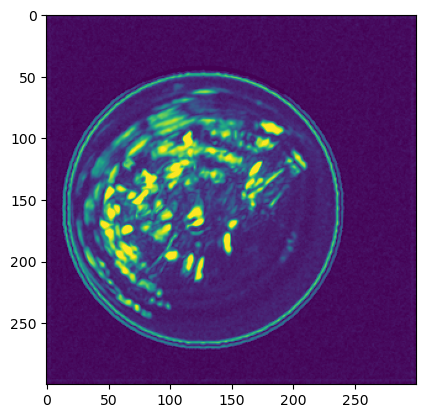

In [9]:
visualization.plot_contours(spatial_np1[:,15], template01[0],colors='k');

In [ ]:
visualization.plot_contours(A_new[:,19], templates[1],colors='k');

In [ ]:
import scipy
C_original = data2.estimates.C
plt.figure()
plt.subplot(2,1,1)
plt.plot(C_2[17])
plt.subplot(2,1,2)
plt.plot(F_df_new[17])

In [ ]:
np.corrcoef(C_original,F_df_new)

In [ ]:
def zscore_trace(denoised_trace, 
                 raw_trace, 
                 offset_method = 'floor', 
                 sn_method='logmexp', 
                 range_ff=[0.25, 0.5]):
    """
    "Z-score" calcium traces based on a calculation of noise from
    power spectral density high frequency.

    Inputs:
        denoised_trace: from estimates.C
        raw_trace: from estimates.C + estimates.YrA
        offset_method: offset to use when shifting the trace (default: 'floor')
            'floor': minimum of the trace so new min will be zero
            'mean': mean of the raw/denoised trace as the zeroing point
            'median': median of raw/denoised trace
            'none': no offset just normalize
        sn_method: how are psd central values caluclated 
            mean
            median' or 'logmexp')
        range_ff: 2-elt array-like range of frequencies (input for GetSn) (default [0.25, 0.5])

    Returns 
        z_denoised: same shape as denoised_trace
        z_raw: same shape as raw trace
        trace_noise: noise level from z_raw
        
    Adapted from code by Zach Barry.
    """
    noise = GetSn(raw_trace, range_ff=range_ff, method=sn_method)  #import this from caiman

    if offset_method == 'floor':
        raw_offset = np.min(raw_trace)
        denoised_offset = np.min(denoised_trace)
    elif offset_method == 'mean':
        raw_offset = np.mean(raw_trace)
        denoised_offset = np.mean(denoised_trace)
    elif offset_method == 'median':
        raw_offset = np.median(raw_trace)
        denoised_offset = np.median(denoised_trace)
    elif offset_method == 'none':
        raw_offset = 0
        denoised_offset = 0
    else:
        raise ValueError("offset_method should be floor, mean, median, or none.")
           
    z_raw = (raw_trace - raw_offset) / noise
    z_denoised = (denoised_trace - denoised_offset)/ noise
        
    return z_denoised, z_raw, noise

def zscore_traces(cnm_c, 
                  cnm_yra, 
                  offset_method = 'floor', 
                  sn_method = 'logmexp', 
                  range_ff=[0.25, 0.5]):
    """
    apply zscore_trace to all traces in estimates
    
    inputs:
        cnm_c: C array of denoised traces from cnm.estimates
        cnm_yra: YrA array of residuals from cnm.estimate
        offset_method: floor/mean/median (see zscore_trace)
        sn_method: mean/median/logmexp (see zscore_trace)
        range_ff: frequency range for GetSn
    
    outputs:
        denoised_z_traces
        raw_z_traces
        noise_all
    """
    raw_traces = cnm_c + cnm_yra  # raw_trace[i] = c[i] + yra[i]
    raw_z_traces = []
    denoised_z_traces = []
    noise_all = []
    for ind, raw_trace in enumerate(raw_traces):
        denoised_trace = cnm_c[ind,:]
        z_denoised, z_raw, noise = zscore_trace(denoised_trace,
                                                raw_trace, 
                                                offset_method=offset_method, 
                                                sn_method = sn_method,
                                                range_ff=range_ff)
        
        denoised_z_traces.append(z_denoised)
        raw_z_traces.append(z_raw)
        noise_all.append(noise)
        
    denoised_z_traces = np.array(denoised_z_traces)
    raw_z_traces = np.array(raw_z_traces)
    noise_all = np.array(noise_all)
    
    return denoised_z_traces, raw_z_traces, noise_all

In [ ]:
from caiman.source_extraction.cnmf.deconvolution import GetSn
denoised_traces = data1.estimates.C
residuals = data1.estimates.YrA
# z_denoised_floor, z_raw_floor, _ = zscore_trace(denoised_traces[13,:], raw_traces[13,:], offset_method='floor', sn_method='logmexp')
denoised_z_traces, raw_z_traces, noise_all = zscore_traces(denoised_traces, residuals, offset_method='floor')

denoised_traces_new = F_df_new
residuals_new = YrA_new
denoised_z_traces_new, raw_z_traces_new, _ = zscore_traces(denoised_traces_new, residuals_new, offset_method='floor', sn_method='logmexp')


## Use `register_multisession()`

The function `register_multisession()` requires 3 arguments:
- `A`: A list of ndarrays or scipy.sparse.csc matrices with (# pixels X # component ROIs) for each session
- `dims`: Dimensions of the FOV, needed to restore spatial components to a 2D image
- `templates`: List of ndarray matrices of size `dims`, template image of each session

In [ ]:
spatial_new = [spatial1,A_new]
templates_new = [template01[0],template01[0]]

In [ ]:
spatial_union, assignments, matchings = register_multisession(A=spatial_new, dims=dims_template, templates=templates_new)

The function returns 3 variables for further analysis:
- `spatial_union`: csc_matrix (# pixels X # total distinct components), the union of all ROIs across all sessions aligned to the FOV of the last session.
- `assignments`: ndarray (# total distinct components X # sessions). `assignments[i,j]=k` means that component `k` from session `j` has been identified as component `i` from the union of all components, otherwise it takes a `NaN` value. Note that for each `i` there is at least one session index `j` where `assignments[i,j]!=NaN`.
- `matchings`: list of (# sessions) lists. Saves `spatial_union` indices of individual components in each session. `matchings[j][k] = i` means that component `k` from session `j` is represented by component `i` in the union of all components `spatial_union`. In other words `assignments[matchings[j][k], j] = j`.

## Post-alignment screening

The three outputs can be used to filter components in various ways. For example we can find the components that were active in at least a given a number of sessions. For more examples, check [this script](https://github.com/flatironinstitute/CaImAn/blob/master/use_cases/eLife_scripts/figure_9/Figure_9_alignment.py) that reproduces the results of [Figure 9, as presented in our eLife paper](https://elifesciences.org/articles/38173#fig9).

In [ ]:
# Filter components by number of sessions the component could be found

n_reg = 1
# Use number of non-NaNs in each row to filter out components that were not registered in enough sessions
assignments_filtered = np.array(np.nan_to_num(assignments[np.sum(~np.isnan(assignments), axis=1) >= n_reg]), dtype=int);

# Use filtered indices to select the corresponding spatial components
spatial_filtered = spatial[0][:, assignments_filtered[:, 0]]

# Plot spatial components of the selected components on the template of the last session
visualization.plot_contours(spatial_filtered, templates[0]);

In [ ]:
assignments

In [ ]:
assignments_combined = []
for i in assignments:
    if (i[0] in idx_1 and (not np.isnan(i[1]))) or (i[1] in idx_2 and (not np.isnan(i[0]))):
        assignments_combined.append(i)
        
# assignments_combined.append(np.array([0,47]))

In [ ]:
assignments_combined

In [ ]:
assignments_combined_np = np.array(assignments_combined)

In [ ]:
[int(i) for i in assignments_combined_np[:,0]]

In [ ]:
assignments_combined_np[:,0]

In [ ]:
idx_1

In [ ]:
idx_2

## Combining data of components over multiple sessions

Now that all sessions are aligned and we have a list of re-registered neurons, we can use `assignments` and `matchings` to collect traces from neurons over different sessions.

As an exercise, we can collect the traces of all neurons that were registered in all sessions. We already gathered the indices of these neurons in the previous cell in `assignments_filtered`. Assuming that traces of each session are saved in their own `CNMF` object collected in a list, we can iterate through `assignments_filtered` and use these indices to find the re-registered neurons in every session.

Note: This notebook does not include the traces of the extracted neurons, only their spatial components. As such the loop below will produce an error. However, it demonstrates how to use the results of the registration to in your own analysis to extract the traces of the same neurons across different sessions.

In [ ]:
# traces_ = np.zeros((assignments_combined_np.shape[0],) + (tot_len,), dtype=np.ndarray)
# print(traces_.shape)
# for i in range(traces_.shape[0]):
#     for j in range(assignments_combined_np.shape[1]):
#         print(assignments_combined_np[i,j])
#         traces_[i,sum(length[0:j]):sum(length[0:j+1])] = cnm_list[j].estimates.C[[int(assignments_combined_np[i,j])]]

In [ ]:
# traces_ = np.zeros((assignments_combined_np.shape[0],) + (length[1],), dtype=np.ndarray)
# print(traces_.shape)
# for i in range(traces_.shape[0]):
#     j=1
#     print(assignments_combined_np[i,j])
#     traces_[i,:] = cnm_list[j].estimates.C[[int(assignments_combined_np[i,j])]]

In [ ]:
## original segment in the demo 
# traces = np.zeros(assignments_filtered.shape, dtype=np.ndarray)
# for i in range(traces.shape[0]):
#     for j in range(traces.shape[1]):
        
#         traces[i,j] = cnm_list[j].estimates.C[int(assignments_filtered[i,j])]

In [ ]:
# with open(dir02+'traces_registered.pickle', 'wb') as f:
#     pickle.dump(traces_, f)
# with open(dir02+'idx_registered.pickle', 'wb') as f:
#     pickle.dump(assignments_combined_np[:,0], f)

In [ ]:
# dir03 = '/media/watson/UbuntuHDD/feng_Xin/Xin/Miniscope/4914202252023/06072023/12_52_03/'
# with open(dir03+os.sep+'idx_registered.pickle', 'rb') as f:
#     aaa = pickle.load(f)
# print(aaa)

Now we have the array `traces`, where element `traces[i,j] = k` is the temporal component of neuron `i` at session `j`. This can be performed with `F_dff` data or `S` spikes as well.